<a href="https://colab.research.google.com/github/Priyabrat845/Patient-mortality-prediction-by-Deep-Learning/blob/main/Patient_mortality_with_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Patient mortality Prediction - Deep Learning**

In [ ]:
# Import all libraries.
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import the dataset.
df = pd.read_csv('/content/FIC.Full CSV.csv')

In [ ]:
# Show first 5 rows of dataset.
df.head()

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,0,34


In [ ]:
df.shape

(368, 60)

The dataset has 368 rows and 60 features in total.

# **EDA**

In [ ]:
df.isnull().sum()

Age                                                                                         0
Age.Group                                                                                   0
Gender                                                                                      0
Locality                                                                                    0
Marital status                                                                              0
Life.Style                                                                                  0
Sleep                                                                                       0
Category                                                                                    0
Depression                                                                                  0
Hyperlipi                                                                                   0
Smoking                                                     

From the above we could see that, there are no missing values in the dataset. So, we don't need to handle the missing values during the pre-processing of the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 60 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Age                                                                                       368 non-null    int64  
 1   Age.Group                                                                                 368 non-null    object 
 2   Gender                                                                                    368 non-null    object 
 3   Locality                                                                                  368 non-null    object 
 4   Marital status                                                                            368 non-null    object 
 5   Life.Style                                               

The dataset contains the features of datatypes Int, Float and Object with no missing values in it.

In [ ]:
df.describe()

,Age,Age.Group,Diabetes,BP,Thrombolysis,BGR,B.Urea,S.Cr,S.Sodium,S.Potassium,...,exang,oldpeak,slope,ca,thal,num,SK,Reaction,Mortality,Follow.Up
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,...,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,54.293478,2.888587,0.461957,121.213315,0.032609,219.991848,51.681522,1.716902,138.019022,4.210870,...,0.562500,1.541848,1.842391,1.002717,5.858696,2.035326,0.983696,0.747283,0.217391,28.652174
std,8.718158,0.948873,0.499229,24.539205,0.177852,139.337387,62.582571,3.609296,4.079879,0.394984,...,0.496754,1.385381,0.564284,1.037442,1.744319,1.031573,0.126816,0.435162,0.413033,15.811860
min,24.000000,0.000000,0.000000,80.500000,0.000000,60.000000,2.300000,0.600000,129.000000,3.300000,...,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,50.750000,2.750000,0.000000,100.700000,0.000000,117.000000,28.000000,0.900000,135.000000,3.900000,...,0.000000,0.275000,1.750000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,15.000000
50%,55.000000,3.000000,0.000000,120.800000,0.000000,164.000000,36.000000,0.900000,138.000000,4.200000,...,1.000000,1.200000,2.000000,1.000000,7.000000,2.000000,1.000000,1.000000,0.000000,32.000000
75%,60.250000,3.250000,1.000000,140.700000,0.000000,291.000000,43.000000,1.100000,141.000000,4.400000,...,1.000000,2.200000,2.000000,2.000000,7.000000,3.000000,1.000000,1.000000,0.000000,36.000000
max,77.000000,5.000000,1.000000,190.110000,1.000000,563.000000,394.000000,22.900000,146.000000,5.300000,...,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,1.000000,1.000000,1.000000,60.000000


The above table is the descriptive statistics of the numerical features present in the dataset. The features don't have any type of outliers or abnormal values in it.

In [ ]:
df['Age'].min()

24

The minimum age is 24 years in this dataset.

In [ ]:
df['Age'].max()

77

The maximum age of the patient is 77 years in this dataset.

In [ ]:
df[df['Age']==24]

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
25,24,21-30,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1,1,COUGH.BLEEDING,1,0,5
139,24,21-30,Female,URBAN,MARRIED,NO,NO,FREE,NO,YES,...,1.6,2,0,7,1,1,NO,0,0,1
189,24,21-30,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1,1,COUGH.BLEEDING,1,0,5
252,24,21-30,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1,1,COUGH.BLEEDING,1,0,5
304,24,21-30,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1,1,COUGH.BLEEDING,1,0,5
341,24,21-30,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1,1,COUGH.BLEEDING,1,0,5


In [ ]:
df[df['Age']==77]

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
138,77,21-30,Male,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,0.0,1,3,3,4,1,STOMACH.BLEEDING,1,0,36


From the above we could see that, the age 77 has been misclassified into age group 21-30 which will be corrected in pre-process section.

In [ ]:
df['BGR'].unique()

array([ 84, 135, 146,  85, 166,  96, 129, 117, 164, 213, 320, 152, 115,
       280, 210,  60, 251, 363, 260, 125, 208, 127, 323, 110, 291, 426,
        89, 131, 348, 563, 392,  86, 102, 137, 153, 463, 231, 512])

In [ ]:
# Show all Numerical & categorical features in the dataset.
Numcolumns = df.select_dtypes('number').columns.tolist()
print('Numerical columns = ', Numcolumns)
Catcolumns = df.select_dtypes('object').columns.tolist()
print('Categorical columns = ', Catcolumns)

Numerical columns =  ['Age', 'F.History', 'Diabetes', 'BP', 'Thrombolysis', 'BGR', 'B.Urea', 'S.Cr', 'S.Sodium', 'S.Potassium', 'S.Chloride', 'C.P.K', 'CK.MB', 'ESR', 'WBC', 'RBC', 'Hemoglobin', 'P.C.V', 'M.C.V', 'M.C.H', 'M.C.H.C', 'PLATELET_COUNT', 'NEUTROPHIL', 'LYMPHO', 'MONOCYTE', 'EOSINO', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'SK', 'Reaction', 'Mortality', 'Follow.Up']
Categorical columns =  ['Age.Group', 'Gender', 'Locality  ', 'Marital status                       ', 'Life.Style                                                                              ', 'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking', 'Family.History', 'HTN', 'Allergies', 'Others ', 'CO', 'Diagnosis', 'Hypersensitivity', 'SK.React']


From the above we could see that, the feature names contain unnecessary blank spaces that would be removed from the dataset in future steps.

In [ ]:
# Show unique values for all categorical features in the dataset.
for c in Catcolumns:
  print('{} = {} \n'.format(c,df[c].unique()))

Age.Group = ['41-50' '51-60' '61-70' '21-30' '31-40'] 

Gender = ['Female' 'Male'] 

Locality   = ['RURAL' 'URBAN'] 

Marital status                        = ['MARRIED' 'SINGLE'] 

Life.Style                                                                               = ['NO' 'YES'] 

Sleep = ['NO' 'YES'] 

Category = ['FREE' 'PAID'] 

Depression = ['YES' 'NO'] 

Hyperlipi = ['YES' 'NO'] 

Smoking = ['NO' 'YES'] 

Family.History = ['NO' 'YES'] 

HTN = ['NO' 'YES'] 

Allergies = ['NO' 'YES'] 

Others  = ['no' 'LV dysfunction' 'HTN' 'PND, ORTHOPENIA' 'IHD, SOB' 'DM' 'ACS'
 'ICMP WITH EF= 30%,PULMONAR ODEMA' 'CHB, RV INFARCT' 'ORTHOPENIA, PND'
 'HCV, IHD' 'SEIZARIAN, HYSTECTOMY.' 'HTN, DM' 'IHD, HTN'
 'PULMONARY ODEMA ' 'DM,M.I' 'IHD,DM'] 

CO = ['Chest pain,' 'Central Chest pain,' 'Chest pain,SOB, Cold sweating'
 'CENTRAL Chest pain,' 'SOB FROM 1 DAY ' 'Chest pain, SWEATING'
 'Chest pain,SOB' 'Chest pain 1 hr' 'Chest pain, VOMITING'
 'Chest pain,heart sinking, vomiting'
 'Chest pain,nau

In [ ]:
# Age Group distribution
px.pie(df,values=df["Age.Group"].value_counts(),names=df["Age.Group"].unique(), title="AGE GROUP DISTRIBUTION")

In [ ]:
df['Gender'].value_counts()

Male      285
Female     83
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Gender frequency distribution')

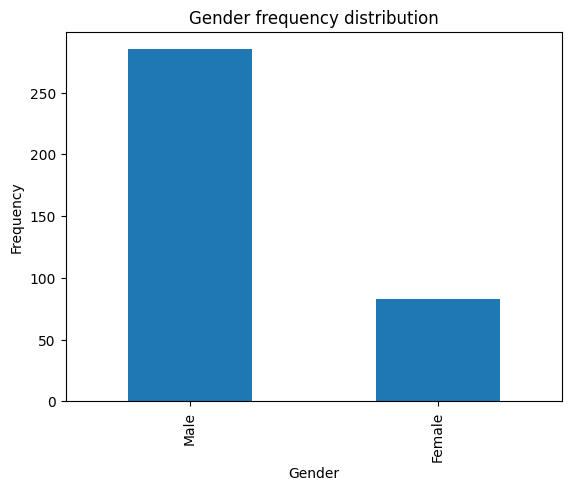

In [ ]:
# Sex distribution
df['Gender'].value_counts().plot.bar()
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender frequency distribution')

Higher frequency of male patients as compared to female in the dataset.

In [ ]:
df.groupby(['Age.Group','Mortality'])['Mortality'].count()

Age.Group  Mortality
21-30      0             12
31-40      0             12
           1              8
41-50      0             25
           1             36
51-60      0            178
           1              6
61-70      0             61
           1             30
Name: Mortality, dtype: int64

Text(0.5, 1.0, 'Age Group vs Mortality frequency distribution')

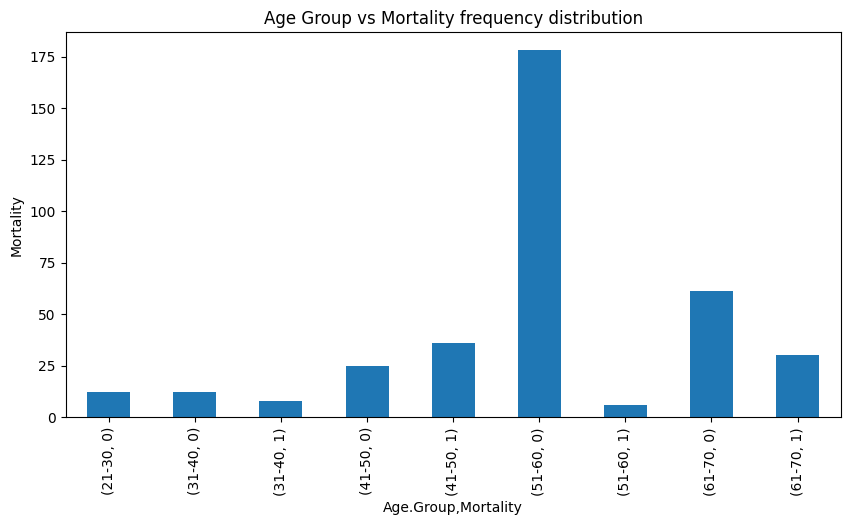

In [ ]:
# Age Group vs Mortality frequency distribution graph.
color=['red','blue','pink','yellow','black']
df.groupby(['Age.Group','Mortality'])['Mortality'].count().plot.bar(figsize=(10,5))
plt.ylabel('Mortality')
plt.title('Age Group vs Mortality frequency distribution')

The age group 51-60 has the lowest mortality rate and for 41-50 it's the highest.

Text(0.5, 1.0, 'Gender vs Depression frequency distribution')

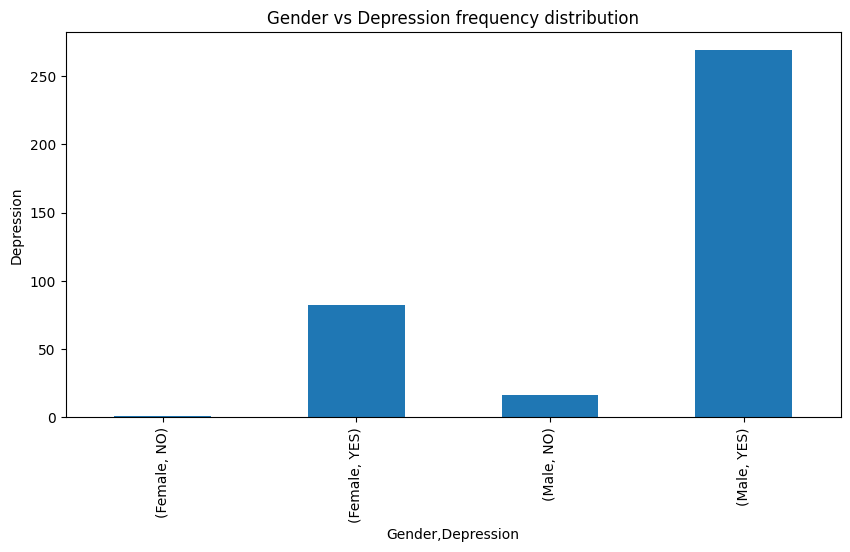

In [ ]:
# Gender vs Depression frequency distribution.
df.groupby(['Gender','Depression'])['Depression'].count().plot.bar(figsize=(10,5))
plt.ylabel('Depression')
plt.title('Gender vs Depression frequency distribution')

Male patients has the higher depression as compared to female in the dataset.

Text(0.5, 1.0, 'Gender vs Hyperlipi frequency distribution')

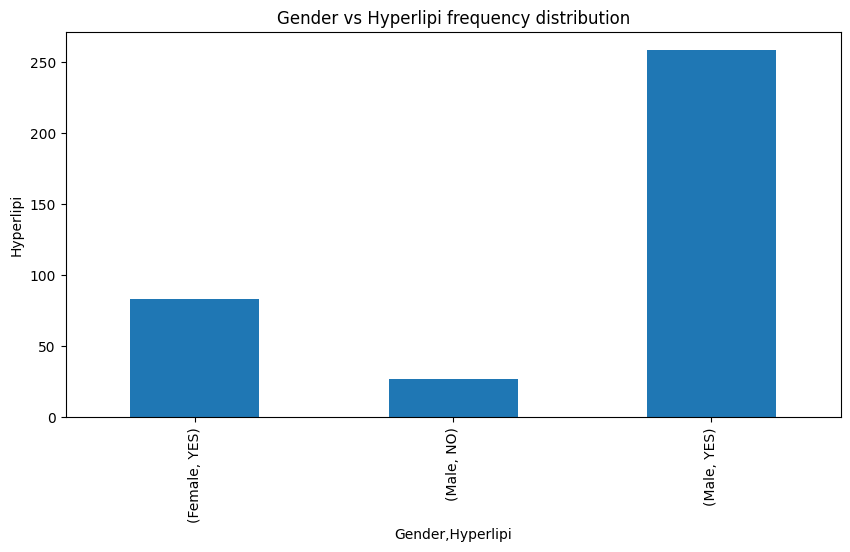

In [ ]:
# Gender vs Hyperlipi frequency distribution.
df.groupby(['Gender','Hyperlipi'])['Hyperlipi'].count().plot.bar(figsize=(10,5))
plt.ylabel('Hyperlipi')
plt.title('Gender vs Hyperlipi frequency distribution')

Again the male patients has the higher hyperlipi frequency as compared to female in the dataset.

Text(0.5, 1.0, 'Gender vs Life style frequency distribution')

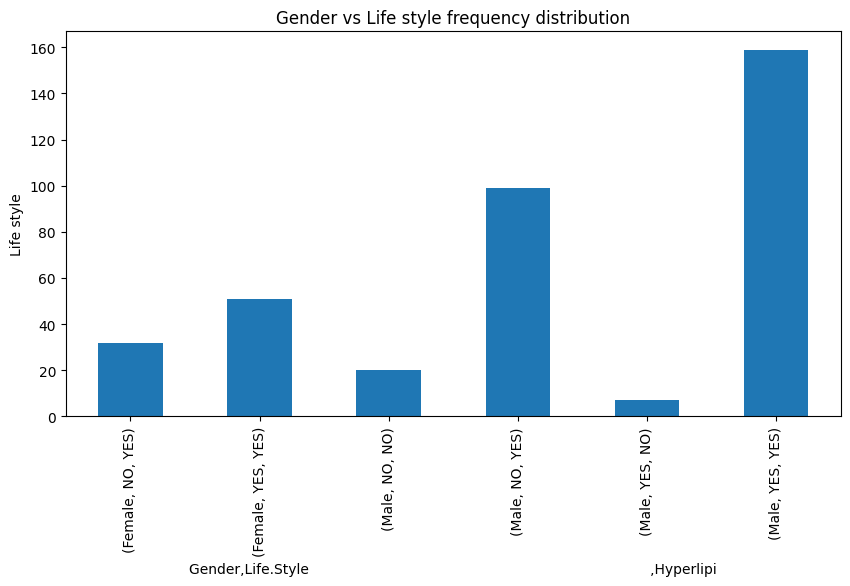

In [ ]:
# Gender vs Life style frequency distribution.
df.groupby(['Gender','Life.Style                                                                              ','Hyperlipi'])['Hyperlipi'].count().plot.bar(figsize=(10,5))
plt.ylabel('Life style')
plt.title('Gender vs Life style frequency distribution')

It's strange to see that both men with and without the life style are having the high Hyperlipi frequncy as compared to women. This might be dependent on some other factors as well that we need to identify.

Text(0.5, 1.0, 'Gender vs Diabetese frequency distribution')

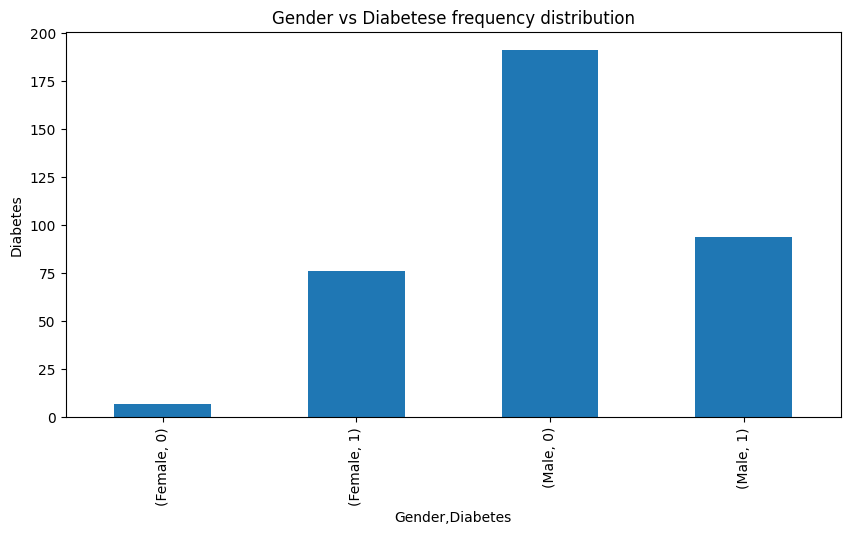

In [ ]:
# Gender vs Diabetes frequency distribution.
df.groupby(['Gender','Diabetes'])['Diabetes'].count().plot.bar(figsize=(10,5))
plt.ylabel('Diabetes')
plt.title('Gender vs Diabetese frequency distribution')

There were more male diabetes patients as compared to female present in the dataset.

Text(0.5, 1.0, 'Gender, Diabetes vs Mortality frequency distribution')

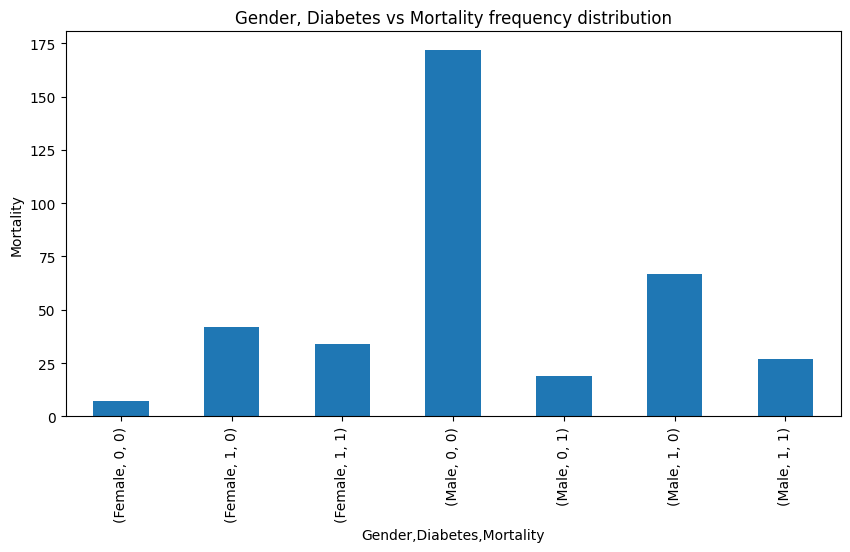

In [ ]:
# Gender, Diabetese vs Diabetes frequency distribution.
df.groupby(['Gender','Diabetes','Mortality'])['Mortality'].count().plot.bar(figsize=(10,5))
plt.ylabel('Mortality')
plt.title('Gender, Diabetes vs Mortality frequency distribution')


<Axes: >

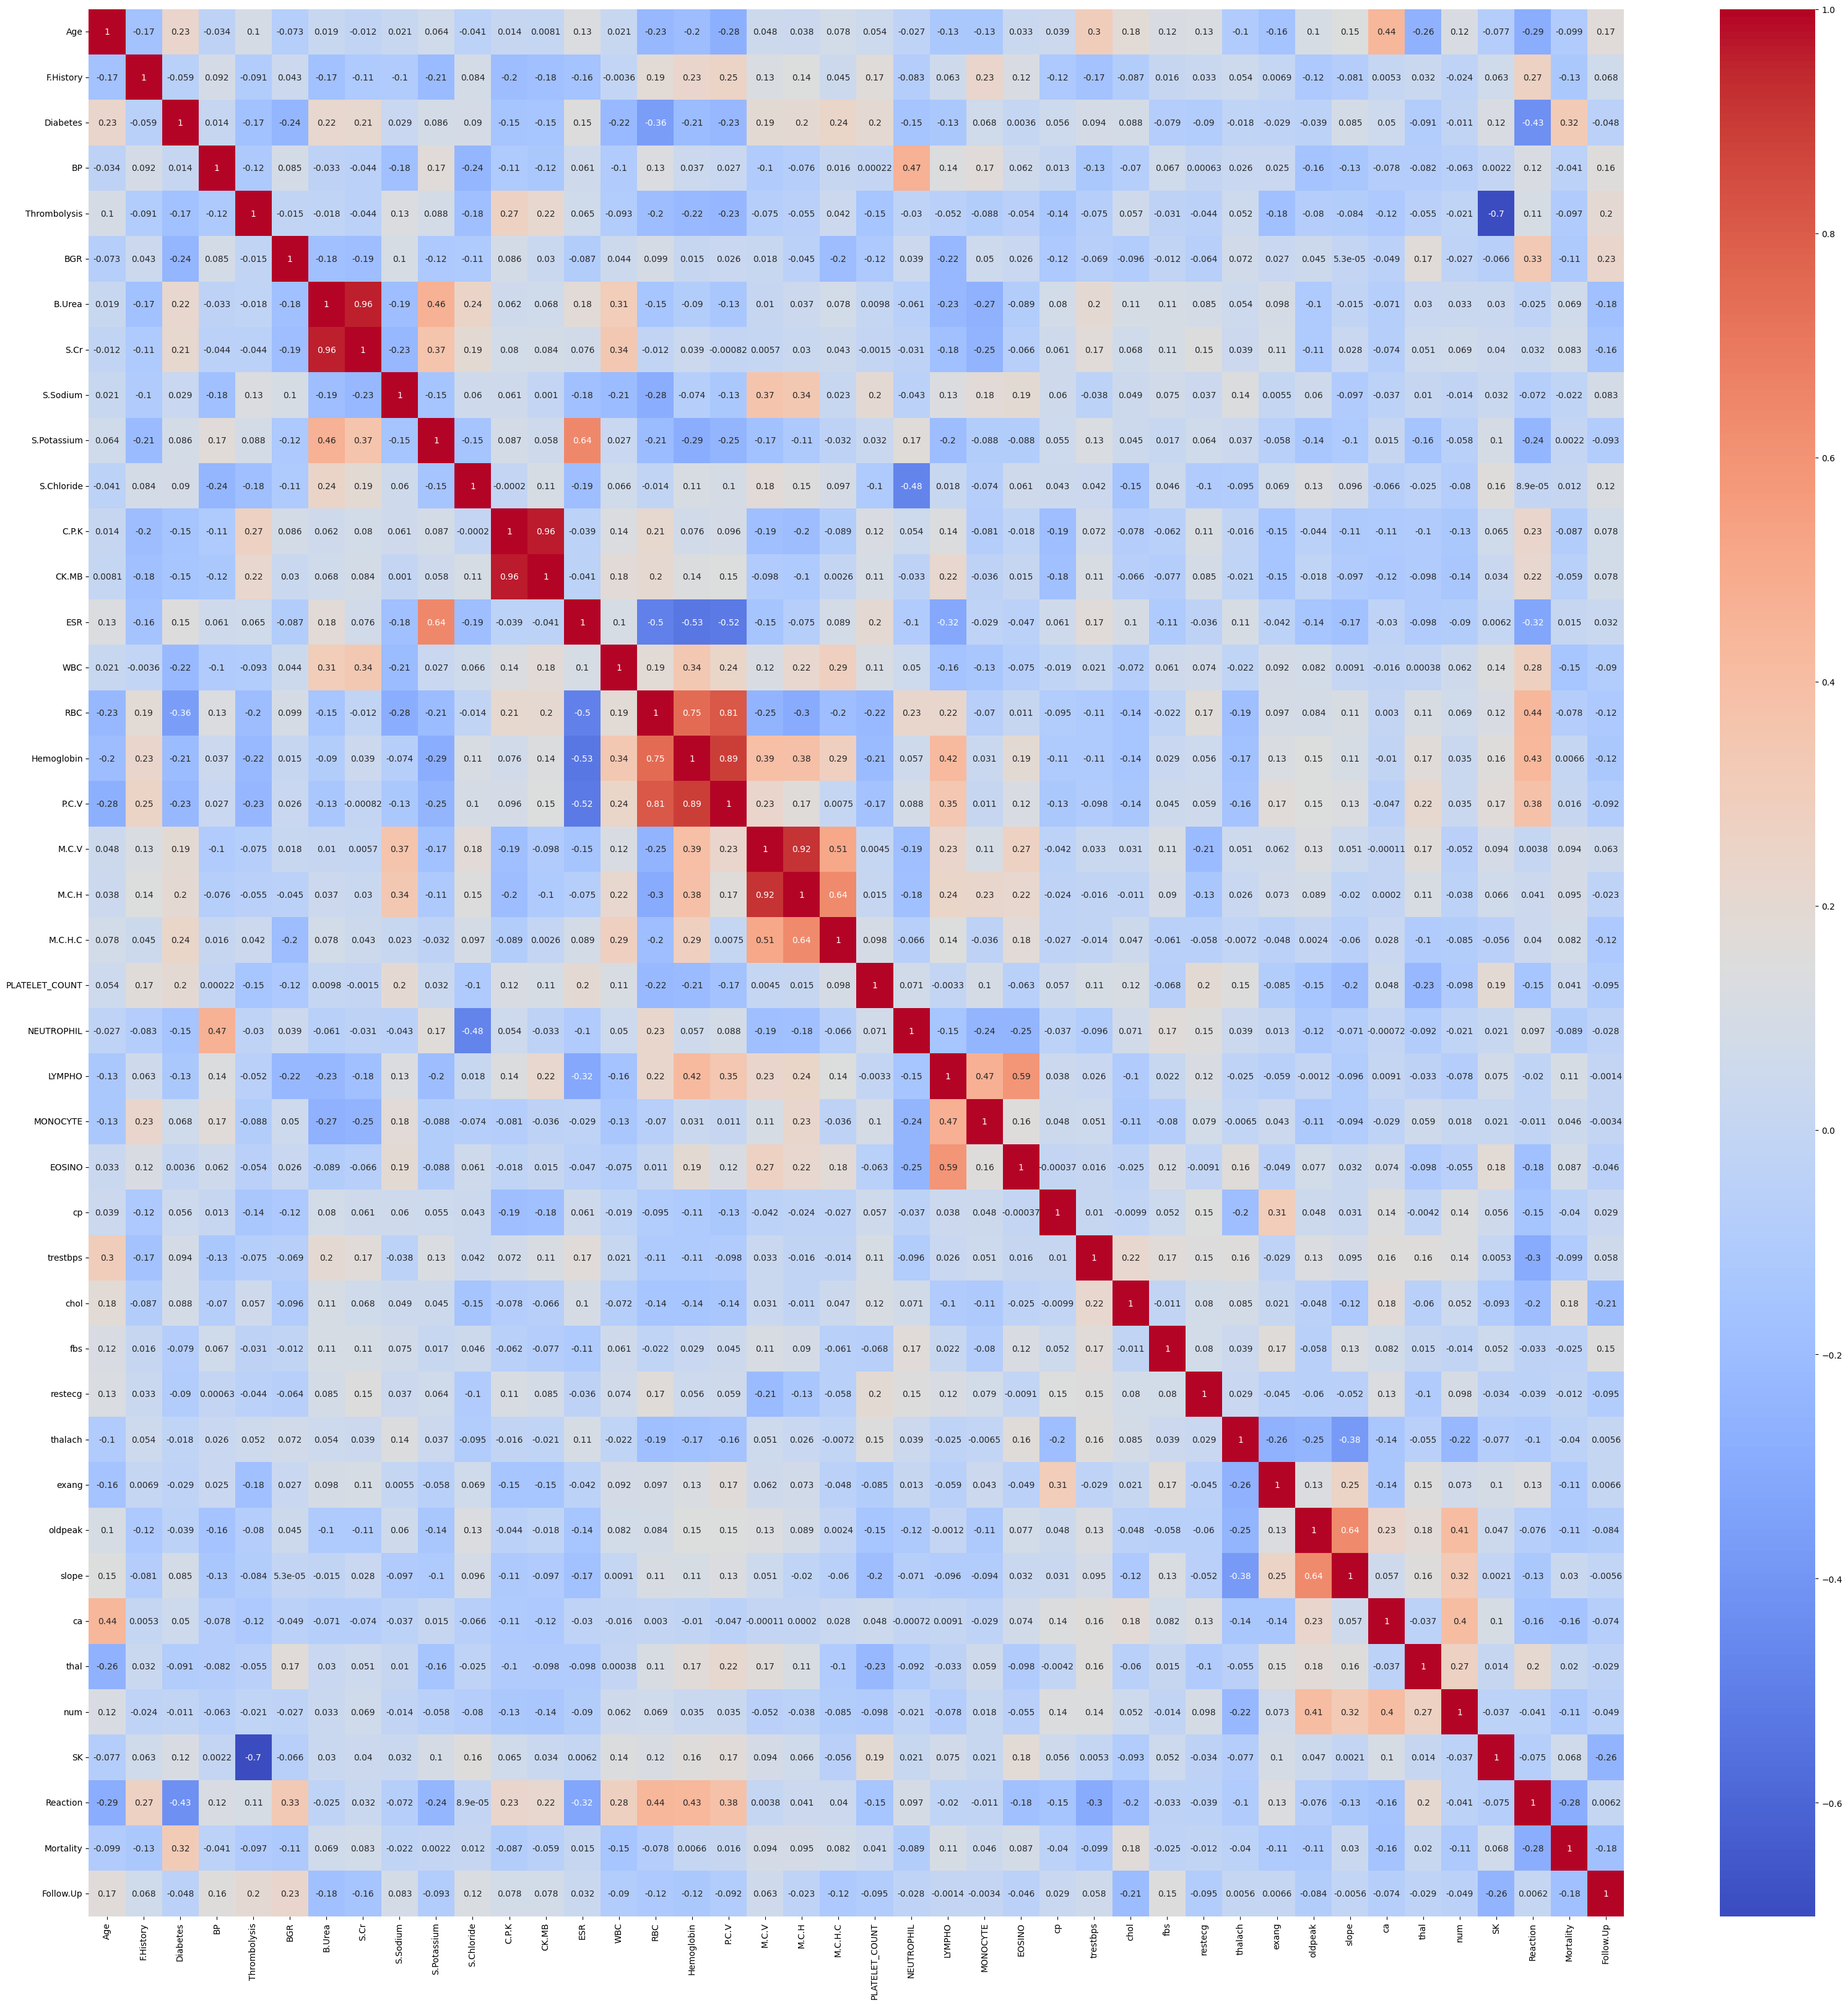

In [ ]:
# Heatmap to show the correlation between the features.
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

In [ ]:
# Correlation coefficients for the correlation between the independent & dependent features.
corr_matrix = df.corr()
print(corr_matrix['Mortality'].sort_values(ascending=False))

Mortality         1.000000
Diabetes          0.317722
chol              0.175142
LYMPHO            0.106187
M.C.H             0.095050
M.C.V             0.094364
EOSINO            0.087040
S.Cr              0.082850
M.C.H.C           0.082435
B.Urea            0.069328
SK                0.067853
MONOCYTE          0.046161
PLATELET_COUNT    0.040522
slope             0.030498
thal              0.020061
P.C.V             0.016327
ESR               0.015143
S.Chloride        0.011773
Hemoglobin        0.006626
S.Potassium       0.002179
restecg          -0.012401
S.Sodium         -0.021864
fbs              -0.024669
thalach          -0.039567
cp               -0.040081
BP               -0.041203
CK.MB            -0.059392
RBC              -0.078343
C.P.K            -0.086996
NEUTROPHIL       -0.088878
Thrombolysis     -0.096764
trestbps         -0.098750
Age              -0.099490
exang            -0.106243
oldpeak          -0.110228
BGR              -0.113078
num              -0.114000
F

From the above correlation matrix we could see that, the dependent features Reaction, Follow.up, CA has the lowest correlation coefficient values. That means these features don't have much significnce on the dependent variable. So, we were good to remove these columns from our dataset and it's not going to degrade the model's performance.

# **Preprocessing**

In [ ]:
# Remove unnecessary blank space from the feature names or dataset labels.
df.rename(columns = {'Locality  ':'Locality','Marital status                       ':'Marital status','Life.Style                                                                              ':'Life.Style','Others ':'Others'}, inplace = True)

In [ ]:
df['Family.History'].value_counts()

NO     296
YES     72
Name: Family.History, dtype: int64

In [ ]:
df['F.History'].value_counts()

0    296
1     72
Name: F.History, dtype: int64

From the above we could see that the columns **Family.History** & **F.History** both are same & providing the same information. So, we can remove one of these columns to reduce the redundancy.

In [ ]:
# Drop F.History column from the datasert.
df.drop('F.History', axis=1, inplace = True)

In [ ]:
df[df['Age']==77]

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
138,77,21-30,Male,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,0.0,1,3,3,4,1,STOMACH.BLEEDING,1,0,36


We could see that the Age 77 has been misclassfied to the age group 21-30 instead of 71-80. So, correcting it.

In [ ]:
# Create a new age category.
df.loc[df['Age']==77,'Age.Group'] = '71-80'
df[df['Age']==77]

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
138,77,71-80,Male,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,0.0,1,3,3,4,1,STOMACH.BLEEDING,1,0,36


In [ ]:
Catcolumns

['Age.Group',
 'Gender',
 'Locality  ',
 'Marital status                       ',
 'Life.Style                                                                              ',
 'Sleep',
 'Category',
 'Depression',
 'Hyperlipi',
 'Smoking',
 'Family.History',
 'HTN',
 'Allergies',
 'Others ',
 'CO',
 'Diagnosis',
 'Hypersensitivity',
 'SK.React']

In [ ]:
df['Others'].unique()

array(['no', 'LV dysfunction', 'HTN', 'PND, ORTHOPENIA', 'IHD, SOB', 'DM',
       'ACS', 'ICMP WITH EF= 30%,PULMONAR ODEMA', 'CHB, RV INFARCT',
       'ORTHOPENIA, PND', 'HCV, IHD', 'SEIZARIAN, HYSTECTOMY.', 'HTN, DM',
       'IHD, HTN', 'PULMONARY ODEMA ', 'DM,M.I', 'IHD,DM'], dtype=object)

In [ ]:
df['Age.Group'].unique()

array(['41-50', '51-60', '61-70', '21-30', '31-40', '71-80'], dtype=object)

In [ ]:
# Label endcoding - convert the age categories into numerical values.
df['Age.Group'].replace(['21-30', '31-40', '41-50', '51-60', '61-70', '71-80'],[0, 1, 2, 3, 4, 5], inplace=True)

In [ ]:
# Show numerical & categorical features present in the dataset.
Numcolumns = df.select_dtypes('number').columns.tolist()
print('Numerical columns = ', Numcolumns)
Catcolumns = df.select_dtypes('object').columns.tolist()
print('Categorical columns = ', Catcolumns)

Numerical columns =  ['Age', 'Age.Group', 'Diabetes', 'BP', 'Thrombolysis', 'BGR', 'B.Urea', 'S.Cr', 'S.Sodium', 'S.Potassium', 'S.Chloride', 'C.P.K', 'CK.MB', 'ESR', 'WBC', 'RBC', 'Hemoglobin', 'P.C.V', 'M.C.V', 'M.C.H', 'M.C.H.C', 'PLATELET_COUNT', 'NEUTROPHIL', 'LYMPHO', 'MONOCYTE', 'EOSINO', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'SK', 'Reaction', 'Mortality', 'Follow.Up']
Categorical columns =  ['Gender', 'Locality', 'Marital status', 'Life.Style', 'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking', 'Family.History', 'HTN', 'Allergies', 'Others', 'CO', 'Diagnosis', 'Hypersensitivity', 'SK.React']


In [ ]:
# Separate the descriptive features from other categorical features.
dum_columns=['Others','CO', 'Diagnosis', 'SK.React']
cod_columns=[]
for col in Catcolumns:
  if col not in dum_columns:
    cod_columns.append(col)

In [ ]:
cod_columns

['Gender',
 'Locality',
 'Marital status',
 'Life.Style',
 'Sleep',
 'Category',
 'Depression',
 'Hyperlipi',
 'Smoking',
 'Family.History',
 'HTN',
 'Allergies',
 'Hypersensitivity']

In [ ]:
# Deal with categorical values using one-hot encoder
df_dumm = pd.get_dummies(df[dum_columns])
# Concatenate the dummies to original dataframe
df_dumm = pd.concat([df[Numcolumns], df_dumm], axis='columns')
df_dumm.head()

,Age,Age.Group,Diabetes,BP,Thrombolysis,BGR,B.Urea,S.Cr,S.Sodium,S.Potassium,...,Diagnosis_ST-T ELEVATION POST SK,Diagnosis_STEMI,"Diagnosis_old I/W M.I, ACS.",SK.React_BODY.PAIN,SK.React_COUGH.BLEEDING,SK.React_LUNGS,SK.React_NAUSEA.TEMP,SK.React_NO,SK.React_SKIN.BLEEDING,SK.React_STOMACH.BLEEDING
0,45,2,1,100.6,0,84,28.0,0.9,138,3.3,...,0,0,0,0,0,0,0,1,0,0
1,51,3,0,90.6,0,135,17.0,0.7,144,4.7,...,0,0,0,0,0,0,0,1,0,0
2,55,3,1,100.7,0,146,37.0,1.0,137,4.2,...,0,0,0,0,0,0,0,1,0,0
3,55,3,1,160.1,0,146,37.0,1.0,137,4.2,...,0,0,0,0,0,0,0,1,0,0
4,56,3,1,90.6,0,85,78.0,1.2,139,4.5,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Deal with categorial values with simple encoder
#df['Gender'] =df['Gender'].astype('category').cat.code
df[cod_columns] = df[cod_columns].astype('category')
df_dumm[cod_columns] = df[cod_columns].apply(lambda x: x.cat.codes)
df_dumm.head()

,Age,Age.Group,Diabetes,BP,Thrombolysis,BGR,B.Urea,S.Cr,S.Sodium,S.Potassium,...,Life.Style,Sleep,Category,Depression,Hyperlipi,Smoking,Family.History,HTN,Allergies,Hypersensitivity
0,45,2,1,100.6,0,84,28.0,0.9,138,3.3,...,0,0,0,1,1,0,0,0,0,0
1,51,3,0,90.6,0,135,17.0,0.7,144,4.7,...,0,0,0,1,1,0,0,0,0,0
2,55,3,1,100.7,0,146,37.0,1.0,137,4.2,...,1,1,0,1,1,0,0,1,0,0
3,55,3,1,160.1,0,146,37.0,1.0,137,4.2,...,1,1,0,1,1,0,0,1,0,0
4,56,3,1,90.6,0,85,78.0,1.2,139,4.5,...,1,0,0,1,1,0,0,1,0,0


In [ ]:
# Create a new dataframe that would be used for modelling in future sections.
df_new = df_dumm.copy()

In [ ]:
df_new.shape

(368, 153)

The new dataframe has 368 rows & 153 features in total.

In [ ]:
df_new['Depression'].unique()

array([1, 0], dtype=int8)

In [ ]:
# Split the dataset into features and target variable
x = df_new.drop('Mortality', axis=1).values
y = df['Mortality'].values

# **Modelling**

In [ ]:
# Train & test splits of dependent & independent features data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Create the neural network model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(152,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/10
7/7 [==============================] - 1s 31ms/step - loss: 0.8756 - accuracy: 0.3773 - val_loss: 0.7339 - val_accuracy: 0.4821
Epoch 2/10
7/7 [==============================] - 0s 10ms/step - loss: 0.7220 - accuracy: 0.5636 - val_loss: 0.6306 - val_accuracy: 0.6250
Epoch 3/10
7/7 [==============================] - 0s 8ms/step - loss: 0.6163 - accuracy: 0.7045 - val_loss: 0.5599 - val_accuracy: 0.7679
Epoch 4/10
7/7 [==============================] - 0s 8ms/step - loss: 0.5481 - accuracy: 0.7773 - val_loss: 0.5136 - val_accuracy: 0.7857
Epoch 5/10
7/7 [==============================] - 0s 11ms/step - loss: 0.5015 - accuracy: 0.8091 - val_loss: 0.4818 - val_accuracy: 0.8214
Epoch 6/10
7/7 [==============================] - 0s 14ms/step - loss: 0.4652 - accuracy: 0.8227 - val_loss: 0.4574 - val_accuracy: 0.8214
Epoch 7/10
7/7 [==============================] - 0s 14ms/step - loss: 0.4366 - accuracy: 0.8273 - val_loss: 0.4366 - val_accuracy: 0.8214
Epoch 8/10
7/7 [=============

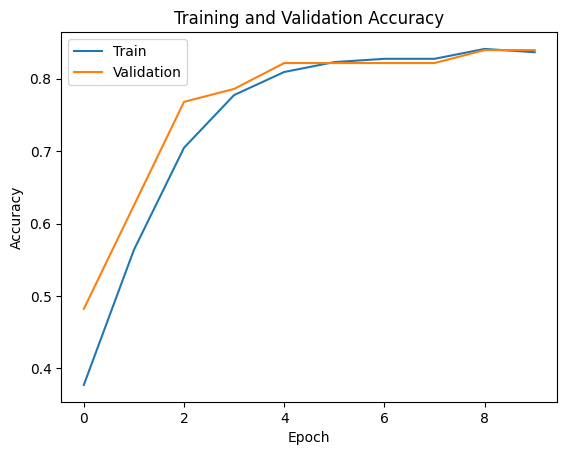

Epoch 1/10
7/7 [==============================] - 0s 20ms/step - loss: 0.3554 - accuracy: 0.8318 - val_loss: 0.3775 - val_accuracy: 0.8929
Epoch 2/10
7/7 [==============================] - 0s 13ms/step - loss: 0.3409 - accuracy: 0.8455 - val_loss: 0.3668 - val_accuracy: 0.8929
Epoch 3/10
7/7 [==============================] - 0s 13ms/step - loss: 0.3262 - accuracy: 0.8500 - val_loss: 0.3577 - val_accuracy: 0.8929
Epoch 4/10
7/7 [==============================] - 0s 13ms/step - loss: 0.3130 - accuracy: 0.8591 - val_loss: 0.3484 - val_accuracy: 0.8929
Epoch 5/10
7/7 [==============================] - 0s 11ms/step - loss: 0.3011 - accuracy: 0.8591 - val_loss: 0.3388 - val_accuracy: 0.8929
Epoch 6/10
7/7 [==============================] - 0s 15ms/step - loss: 0.2887 - accuracy: 0.8591 - val_loss: 0.3327 - val_accuracy: 0.8929
Epoch 7/10
7/7 [==============================] - 0s 13ms/step - loss: 0.2785 - accuracy: 0.8636 - val_loss: 0.3268 - val_accuracy: 0.8929
Epoch 8/10
7/7 [===========

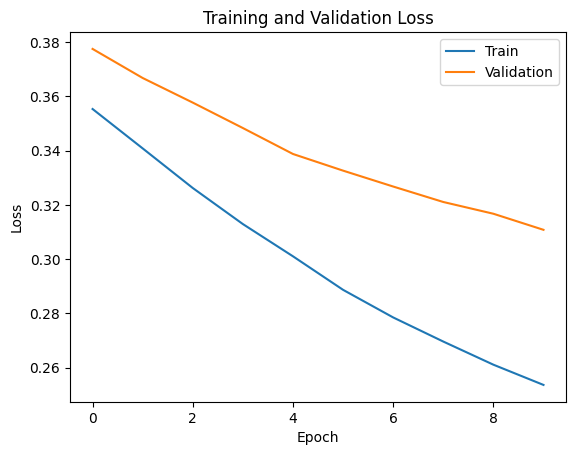

In [ ]:
# Train the model
#model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1)

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
 # Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

#Plotting the training and validation accuracy history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plotting the training and validation loss history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


From the above we could see that:
* ther are significant increase in the train & test accuracies as the number of epochs increases.
* ther are significant decrease in the train & test losses as the number of epochs increases.

In [ ]:
# Predictions on test data.
y_pred = model.predict(x_test)
y_pred

3/3 [==============================] - 0s 4ms/step


array([[0.35633418],
       [0.01947835],
       [0.04097934],
       [0.0522032 ],
       [0.03321914],
       [0.01440969],
       [0.4009855 ],
       [0.4344019 ],
       [0.45223045],
       [0.1459665 ],
       [0.1250273 ],
       [0.5255013 ],
       [0.85183346],
       [0.01409436],
       [0.0136809 ],
       [0.96411705],
       [0.487406  ],
       [0.05694461],
       [0.38564605],
       [0.4141876 ],
       [0.38066918],
       [0.0406712 ],
       [0.38374844],
       [0.38728693],
       [0.12419222],
       [0.51592463],
       [0.38374844],
       [0.35896564],
       [0.2795675 ],
       [0.10387169],
       [0.2795675 ],
       [0.96422225],
       [0.05514561],
       [0.5255013 ],
       [0.05380511],
       [0.00925689],
       [0.35633418],
       [0.2569301 ],
       [0.2795675 ],
       [0.10402365],
       [0.6262899 ],
       [0.02083448],
       [0.04237123],
       [0.01440969],
       [0.17809053],
       [0.7349017 ],
       [0.04395644],
       [0.131

In [ ]:
# Convert the predicted values into classess.
y_pred_classes = np.round(y_pred)
y_pred_classes = [int(x) for x in y_pred_classes]
y_pred_classes

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

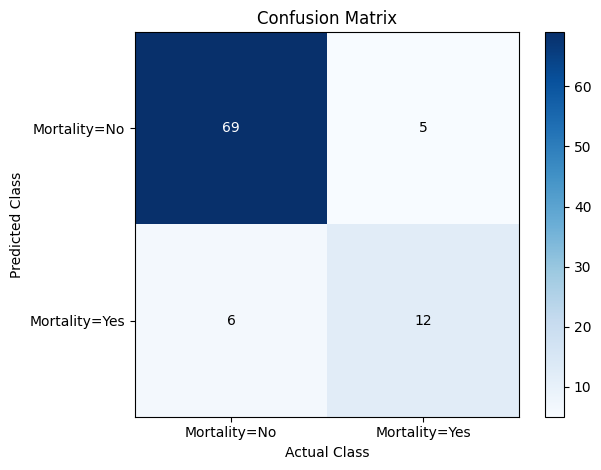

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Define class labels
class_labels = ['Mortality=No', 'Mortality=Yes']

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')

# Fill the confusion matrix cells with values
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f2_score = fbeta_score(y_test, y_pred_classes, beta=2)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F2 Score:", f2_score)

Accuracy: 0.8804347826086957
Precision: 0.7058823529411765
Recall: 0.6666666666666666
F2 Score: 0.6741573033707865


From the above we could see that, the test accuracy is just 89%, which can be optimized further by tuning the hyper-paramters and implementing cross validation process.

# **Optimize Performance**

In [ ]:
# Define a function to create your neural network model
#def create_model(hidden_units=100, learning_rate=0.001):
def create_model(hidden_units, learning_rate):
    model_optimize = Sequential()
    model_optimize.add(Dense(hidden_units, input_dim=x_train.shape[1], activation='relu'))
    model_optimize.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=learning_rate)
    model_optimize.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model_optimize

In [ ]:
# Create a KerasClassifier wrapper for your model
model_optimize = KerasClassifier(build_fn=create_model, verbose=0)

In [ ]:
# Define the hyperparameters you want to tune
param_grid = {
    'hidden_units': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1]
}

In [ ]:
# Perform grid search with cross-validation
grid = GridSearchCV(estimator=model_optimize, param_grid=param_grid, cv=5)
grid_result = grid.fit(x_train, y_train)

In [ ]:
# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters: ", grid_result.best_params_)
print("Best Train Accuracy: {:.2f}".format(grid_result.best_score_))

Best Hyperparameters:  {'hidden_units': 100, 'learning_rate': 0.01}
Best Train Accuracy: 0.85


In [ ]:
# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
y_pred_best = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f2_score = fbeta_score(y_test, y_pred_best, beta=2)
print("Test Accuracy: {:.2f}".format(accuracy))
print("Test Precision: {:.2f}".format(precision))
print("Test Recall: {:.2f}".format(recall))
print("Test F2 Score: {:.2f}".format(f2_score))

3/3 [==============================] - 0s 6ms/step
Test Accuracy: 0.89
Test Precision: 0.79
Test Recall: 0.61
Test F2 Score: 0.64


* From the above we could see that, we are able to optimize the model's accuracy by 1.5% after tuning the hyper-parameters and implementing the cross validations, which is not a very significant change in model's accuracy.
* However, we were able to optimize the model's precision by approx 10%.  


In [ ]:
y_pred_best_classes = np.round(y_pred_best)
y_pred_best_classes = [int(x) for x in y_pred_best_classes]


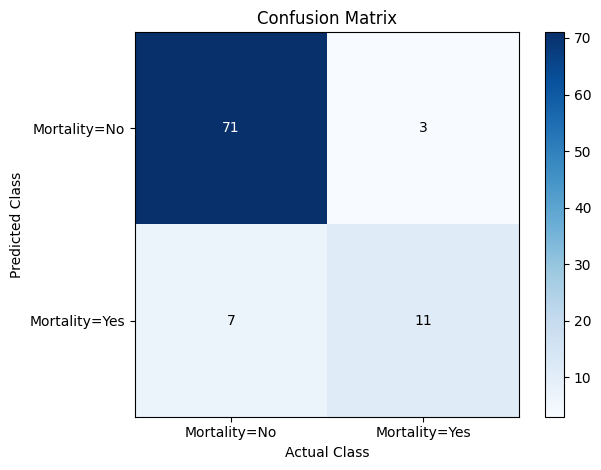

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_best_classes)

# Define class labels
class_labels = ['Mortality=No', 'Mortality=Yes']

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')

# Fill the confusion matrix cells with values
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.show()

# **Challenges & Potential Improvement**

There were few challenges during traning the model which could be avoided further for the potential improvements in the model performance. Few challenges & potential improvements:
* The dataset contains only 368 records in total, which is very less to train and test the model. More deata are needed to train the models so that it ables to find more hidden patterns and performs well.
* There were a few categorical features or columns that hold details about any specific diseases. We could have more disease categorical features, so that we coud have created a new target feature that only holds details regarding broder range of disease details, which could have worked as a derived feature for multi class classification.
* The dataset contains a few unnecessary features like **Reaction**, **Follow-up** etc, that can be removed from the dataset as those don't have any significance in the model's prediction.
* The use of Grid Search Cross Validation helped a bit to optimise the model's performance, howwver it was not a significant improvement. The key reason was again lack of enough data to train the model.
* Also there are no historical details available in the dataset, that could have helped to us to understand the age of certain diseases in the patients & its possible affects.  



# **Conclusion**

So, from the above testings and observations we concluded that:
* After implementing the Grid Search Cross Validation, there was a slight improvement in the model's accuracy to 89%.
* Also there was a significant change in the model's precision by 10% which was a good achivement. However incase of medical scienece a higher value of precision is expected.
* There wasn't enogh dataset to train the model as 368 number of records doesn't seem to be enough to train a deep learning model.
* Also we tried lest test dataset of 15% only instead of 25% so that we could feed more data to the model during the traning. But we didn't see much improvement in the model's performance.
* Accordning to our observations, the Men don't have any life style with high depression percentages as compared to women, that why the Mortality rate of men is less than women.
* Also the men has higher diabets, cholestrol and blood pressure rate compared to women in most of the cases.
* One plus point is that the dataset didn't have any missing values. So, we didn't have to handle it. As you know in health sectors we need the accurate values to make any inferences. We can't just simply replace the NULL values with 0 or any other central tendency measures e.g. Mean, Median or Mode.
* The age group 51-60 has the lowest mortality rate and for 41-50 it's the highest.
* the dependent features Reaction, Follow.up, CA has the lowest correlation coefficient values. That means these features don't have much significnce on the dependent variable. So, we were good to remove these columns from our dataset and it's not going to degrade the model's performance.


